In [1]:
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
from math import pi
from classy import Class

In [2]:
# import stable parameters from file
lna_smg, Delta_Mpl, Dkin, cs2 = np.loadtxt("../stable_params_input/cubic_galileon_stable_params_mathematica.dat", unpack=True)
lna_de, rho_de = np.loadtxt("../stable_params_input/rho_de_stable_cubic_galileon_mathematica.dat", unpack=True, dtype=float)

In [3]:
#####################################################
#
# Set cosmological parameters and other CLASS parameters
#
#####################################################
common_settings = {
                    'output': 'tCl,pCl,lCl,mPk,mTk',
                    'modes': 's',
                    'ic': 'ad',
                    'gauge': 'synchronous',
                    'get_h_from_trace': 'no',
                }

standard_params = {
                   'h': 0.67810,
                   'YHe': 0.24,
                   'omega_b': 0.02238280,
                   'omega_cdm': 0.1201075,
                   'N_ur': 3.044,
                   'n_s': 0.9660499,
                   'A_s': 2.100549e-09
                   }

mochiclass_params = {
                    'Omega_Lambda': 0.,
                    'Omega_fld': 0.,
                    'Omega_smg': -1.,
                    'gravity_model': 'stable_params', 
                    'lna_smg': np.array2string(lna_smg, separator=',', precision=16).replace('\n','').strip('[]'),
                    'Delta_M2': np.array2string(Delta_Mpl, separator=',', precision=16).replace('\n','').strip('[]'),
                    'D_kin': np.array2string(Dkin, separator=',', precision=16).replace('\n','').strip('[]'),
                    'cs2': np.array2string(cs2, separator=',', precision=16).replace('\n','').strip('[]'),
                    'parameters_smg': 1.380051990990777,
                    'method_gr_smg': 'on',
                    'z_gr_smg': 99.,
                    'expansion_model': 'rho_de',
                    'expansion_smg': 0.5,
                    'lna_de': np.array2string(lna_de, separator=',', precision=16).replace('\n','').strip('[]'),
                    'de_evo': np.array2string(rho_de, separator=',', precision=16).replace('\n','').strip('[]'),
                    'skip_stability_tests_smg': 'yes',
                    'a_min_stability_test_smg': 1e-2,
                    'skip_math_stability_smg': 'no',
                    'exp_rate_smg': 1.,
                    'pert_initial_conditions_smg': 'zero',
                    'pert_ic_ini_z_ref_smg': 1e10,    
                    'pert_ic_tolerance_smg': 2e-2, 
                    'pert_ic_regulator_smg': 1e-15,
                    'pert_qs_ic_tolerance_test_smg': 10,
                    'method_qs_smg': 'automatic',
                    'z_fd_qs_smg': 0., 
                    'trigger_mass_qs_smg': 1.e2,
                    'trigger_rad_qs_smg': 1.e2,
                    'eps_s_qs_smg': 0.01,
                    'n_min_qs_smg': 100, 
                    'n_max_qs_smg': 10000 
                }

precision_params = {
                        'start_small_k_at_tau_c_over_tau_h': 1e-4,
                        'start_large_k_at_tau_h_over_tau_k': 1e-4,
                        'perturbations_sampling_stepsize': 0.03,
                        'l_logstep': 1.045,
                        'l_linstep': 25,
                        'k_per_decade_for_pk': 30,
                        'l_switch_limber': 40
                    }

spectra_params =    {
                        'l_max_scalars': 3000,
                        'P_k_max_h/Mpc': 12.,
                        'z_pk': '0, 0.5, 1, 2',
                        'lensing': 'yes',
                    }

In [4]:
# Run mochi_class for modified gravity cosmology with high precision settings
cosmo = Class()

cosmo.set(common_settings)
cosmo.set(standard_params)
cosmo.set(mochiclass_params)
cosmo.set(precision_params)
cosmo.set(spectra_params)

cosmo.compute()

In [5]:
# Run Standard class for LCDM cosmology with high precision settings
mochiclass_params_lcdm = {
                    'Omega_fld': 0.,
                    'Omega_smg': 0.,
                }

cosmo_lcdm = Class()

cosmo_lcdm.set(common_settings)
cosmo_lcdm.set(standard_params)
cosmo_lcdm.set(mochiclass_params_lcdm)
cosmo_lcdm.set(precision_params)
cosmo_lcdm.set(spectra_params)

cosmo_lcdm.compute()

In [6]:
# store power spectra
cls = cosmo.raw_cl(3000)
cls_lcdm = cosmo_lcdm.raw_cl(3000)
ell = cls['ell']
# Define scaling factors and wavenumers in units of 1/Mpc
factor = 1.e10*ell*(ell+1.)/(2*pi)
lens_factor = 1e7*(ell*(ell+1))**2/(2*pi)
kvec = np.logspace(-5,1,500)*cosmo.h()

In [7]:
# uncomment to get plots displayed in notebook
%matplotlib inline
#
import matplotlib
import matplotlib.pyplot as plt
#
plt.rcParams['text.usetex'] = True 
plt.rcParams['text.latex.preamble'] = r'\usepackage[cm]{sfmath}'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'cmss10'
plt.rcParams['font.size'] = '12'
plt.rcParams["figure.figsize"] = [8.0,6.0]

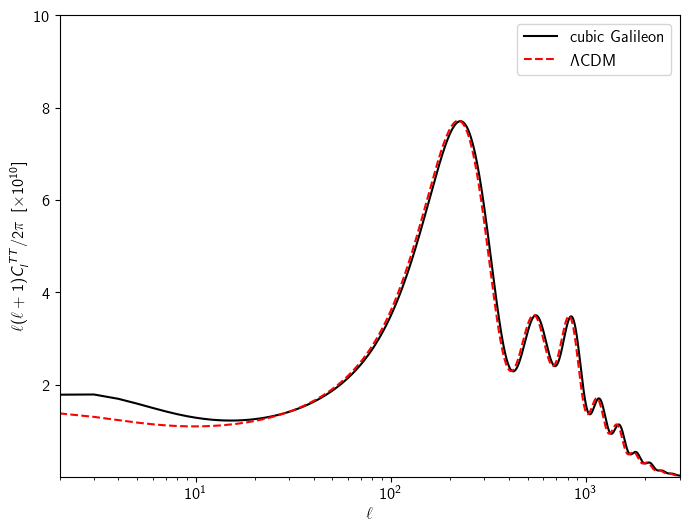

In [8]:
# Plot CMB TT
plt.xlim([2,3000])
plt.ylim([1.e-8,10])
plt.xscale('log')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_l^{TT} / 2 \pi \,\,\, [\times 10^{10}]$")
#
plt.plot(ell,factor*cls['tt'],'k-',label='cubic Galileon',)
plt.plot(ell,factor*cls_lcdm['tt'],'r--',label='$\Lambda$CDM')
plt.legend(loc='best')
#
plt.show()

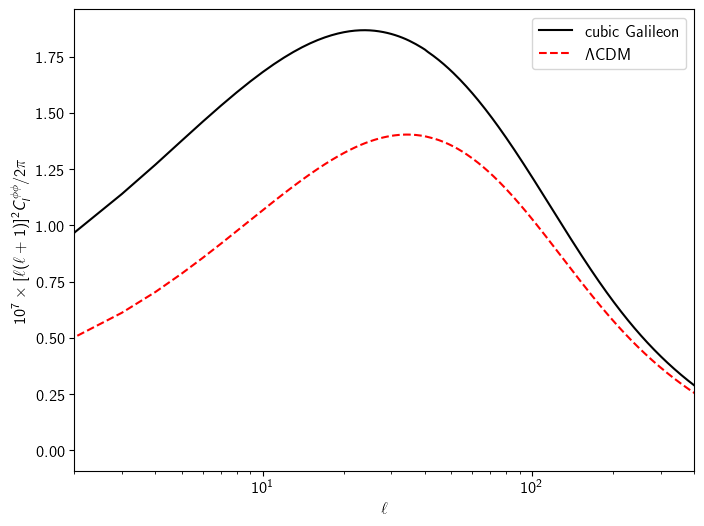

In [10]:
# Plot CMB lensing
plt.xlim([2,400])
plt.xscale('log')
plt.yscale('linear')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$10^7 \times [\ell(\ell+1)]^2 C_l^{\phi\phi}/2\pi$")
#
plt.plot(ell, lens_factor*cls['pp'], 'k-', label='cubic Galileon')
plt.plot(ell, lens_factor*cls_lcdm['pp'], 'r--', label='$\Lambda$CDM')
plt.legend(loc='best')
#
plt.show()

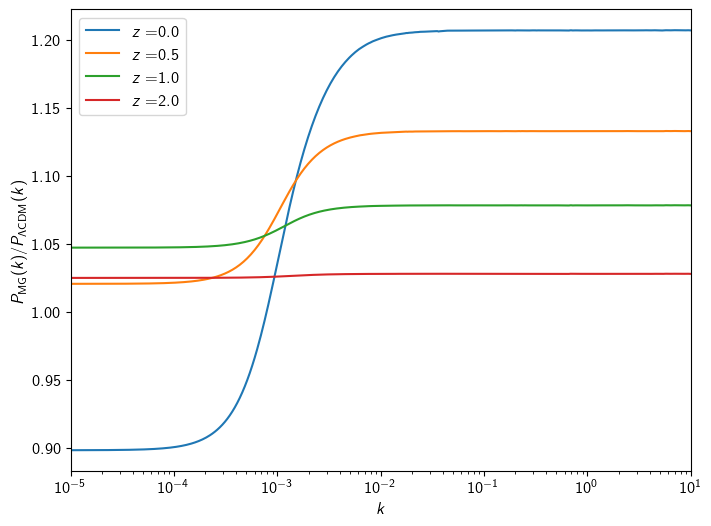

In [11]:
# Plot matter power spectrum
#
# Extract the redshifts string and convert to a NumPy array
z_pk_string = spectra_params['z_pk']
z_pk_list = z_pk_string.split(',')  # Split the string into a list
z_pk_array = np.array([float(z) for z in z_pk_list])  # Convert to floats and then to a NumPy array

pk_mg = np.array([[cosmo.get_pk_all(k,z) for k in kvec] for z in z_pk_array])
pk_lcdm = np.array([[cosmo_lcdm.get_pk_all(k,z) for k in kvec] for z in z_pk_array])

plt.xlim([1e-5,1e1])
plt.xscale('log')
plt.yscale('linear')
plt.xlabel(r"$k$")
plt.ylabel(r"$P_{\rm MG}(k)/P_{\Lambda{\rm CDM}}(k)$")
#
for i,z in enumerate(z_pk_array):
    plt.plot(kvec/cosmo.h(),pk_mg[i]/pk_lcdm[i], label='$z=$'+str(z))

plt.legend(loc='best')

plt.show()

In [12]:
# reset CLASS
cosmo.struct_cleanup()
cosmo_lcdm.struct_cleanup()
cosmo.empty() 
cosmo_lcdm.empty()